In [31]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
# from visualize import show_anns
import os

In [32]:
name = "001教师-陈毅松"
image = cv2.imread(os.path.join("..", "data", "wechatAvatars", f"{name}.jpg"))
masks = np.load(os.path.join("..", "data", "ground_truth", f"{name}.npy"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

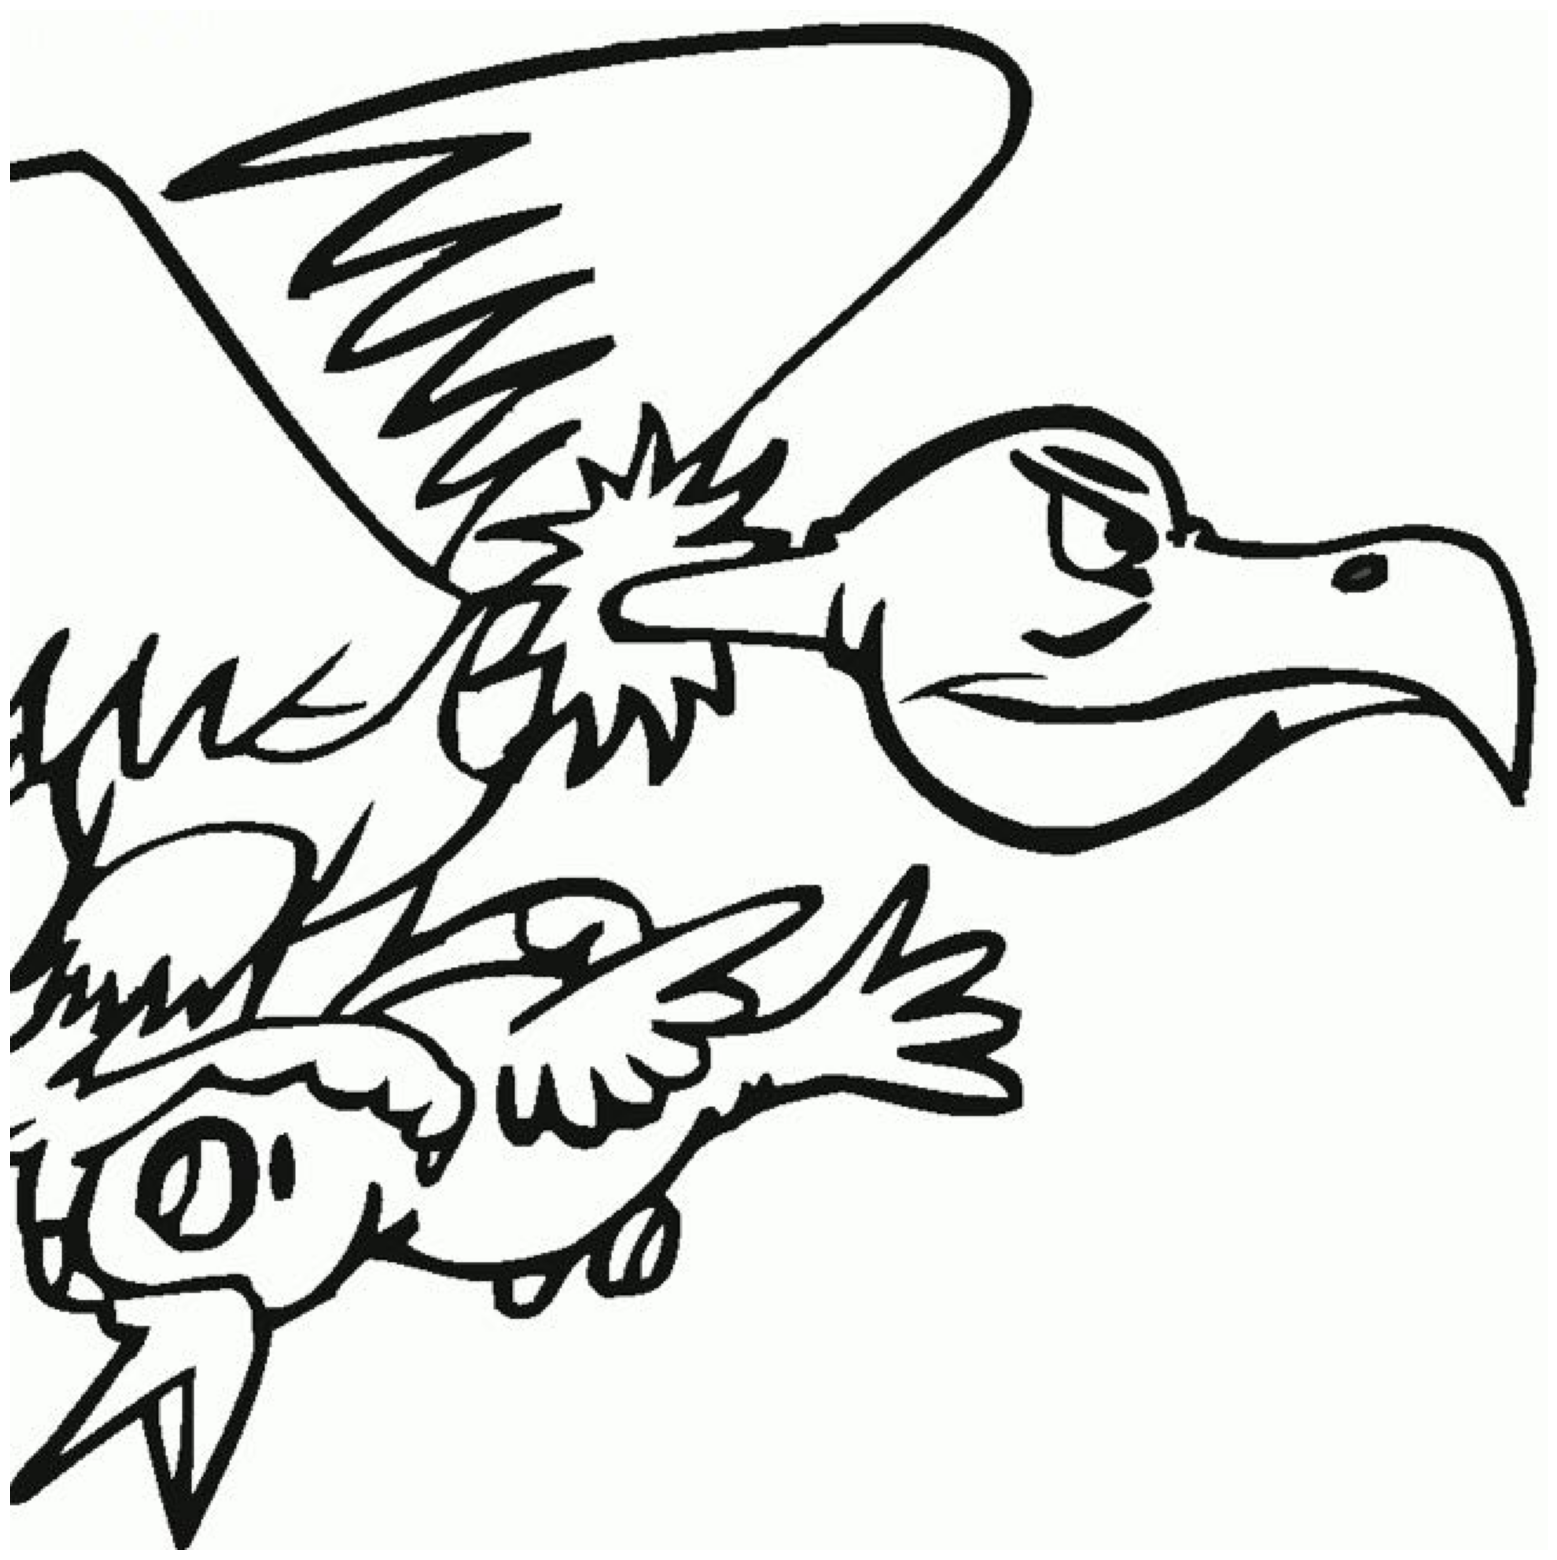

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [39]:
def show_anns(masks:np.ndarray, save_path=''):

    if len(masks) == 0:
        return
    # sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    index = masks.sum(axis=(0, 1))
    sorted_index = np.argsort(index)
    sorted_anns = masks[:, :, sorted_index]

    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns.shape[0], sorted_anns.shape[1], 4))
    img[:,:,3] = 0
    for i in range(sorted_anns.shape[-1]):
        m = masks[:, :, i]
        print(m.sum())
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        # print(color_mask.shape, m.shape, img.shape)
        img[m] = color_mask
    ax.imshow(img)
    
    return img

120268
40173
265
1718
317
1260
120257
380
491
736
1198
2184
5733
2296
1547
2298
2172
1379


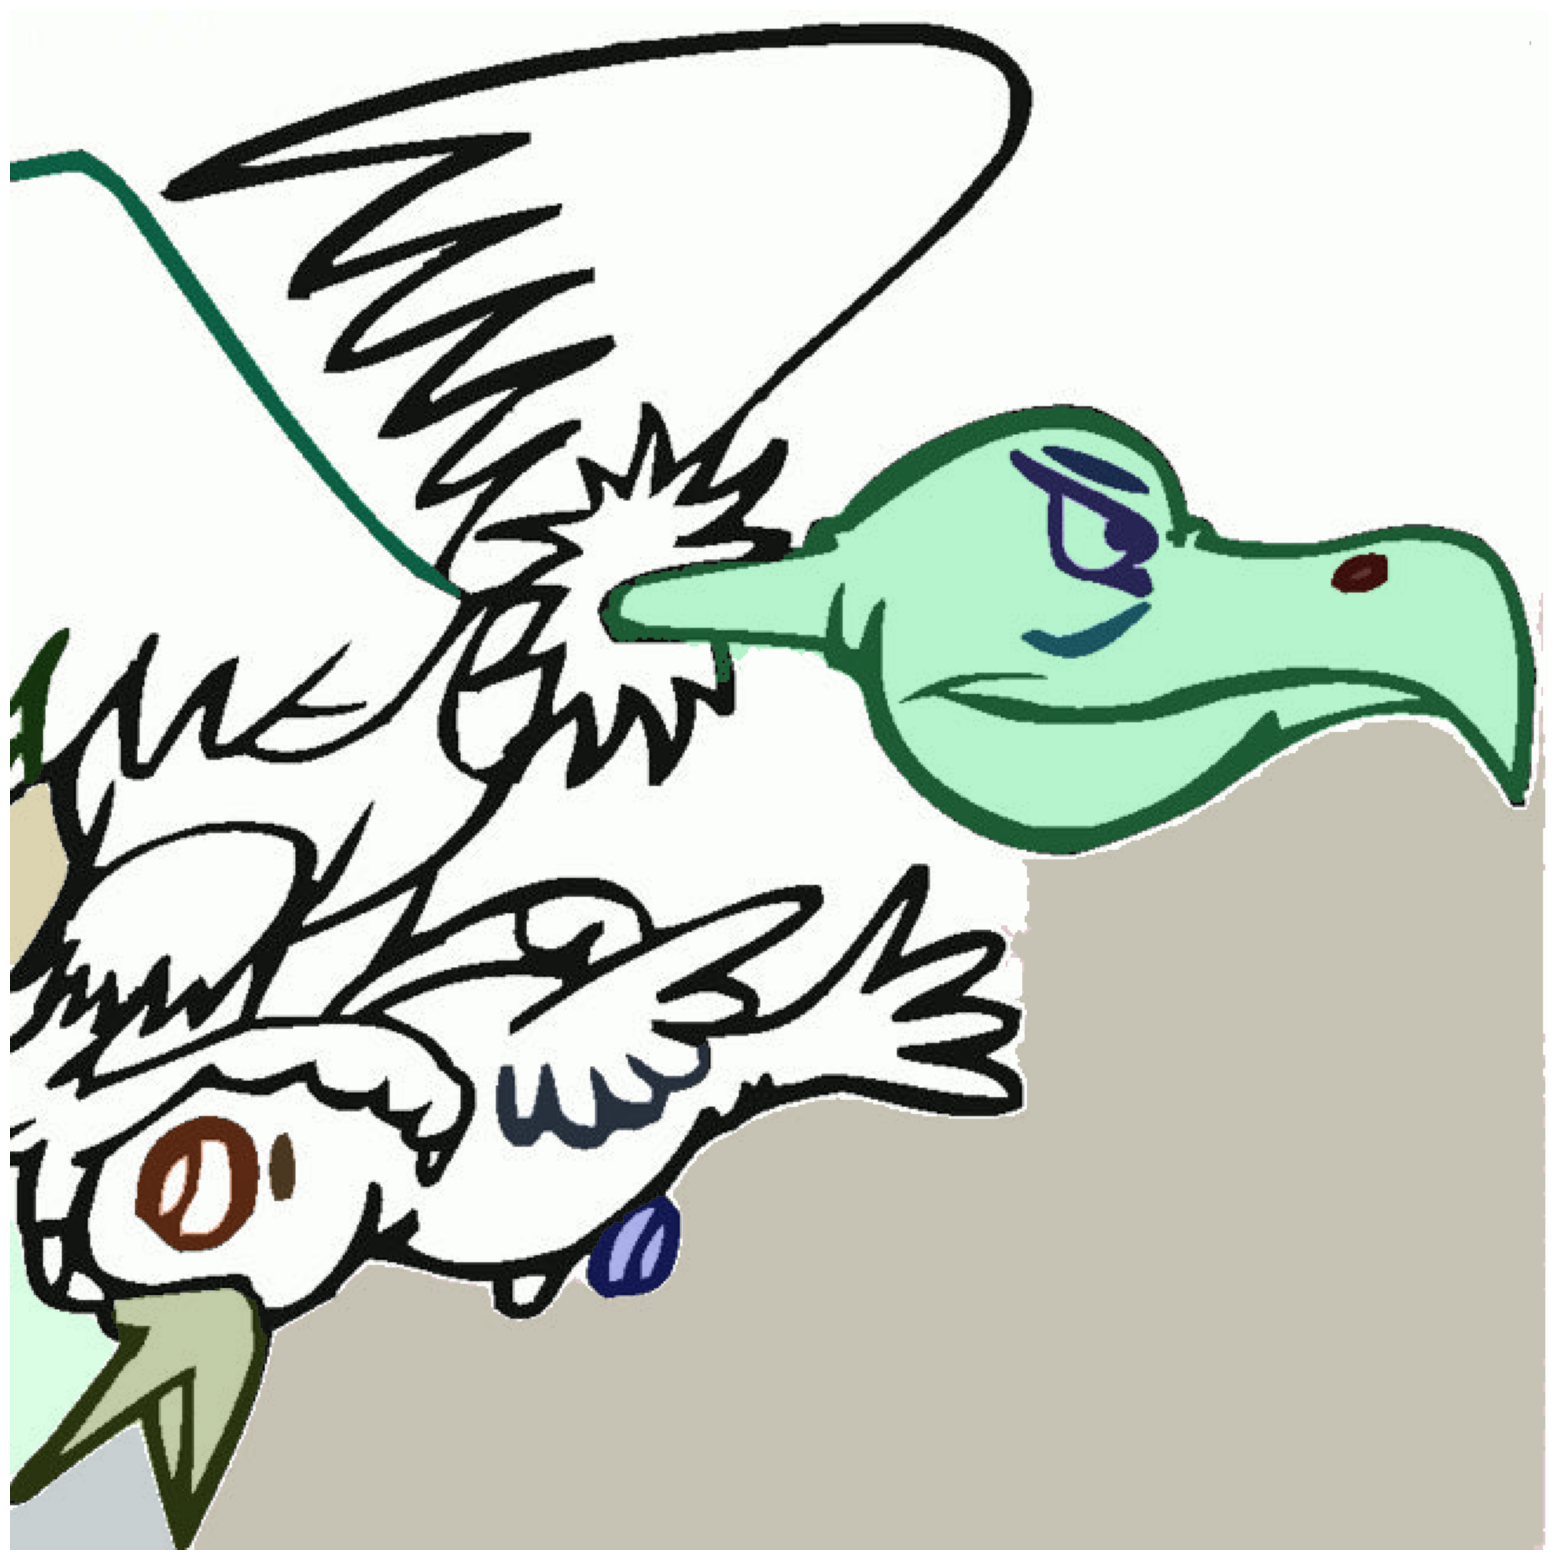

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(20,20))
plt.imshow(image)
img = show_anns(masks[:, :, :-1])
plt.axis('off')
plt.show() 
plt.savefig('plot_image.png')

In [41]:
img 

array([[[0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        ...,
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ]],

       [[0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        ...,
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ]],

       [[0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        ...,
        [0.90268993, 0.10662709, 0.03083135, 0.35      ],
        [0.90268993, 0.106627

In [44]:
image = cv2.imread(os.path.join("..", "data", "wechatAvatars", f"{name}.jpg"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

In [56]:
img = (img * 255).astype(np.uint8)

In [57]:
composite_image = cv2.addWeighted(img, 1, image, 1, 0)

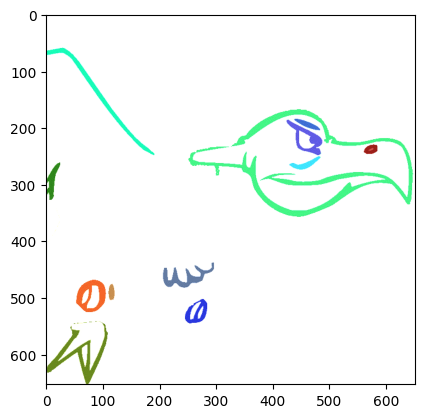

In [58]:
plt.imshow(composite_image)

In [86]:
import math

def visualize_masks(masks, pure_image):

    index = masks.sum(axis=(0, 1))
    sorted_index = np.argsort(index)[::-1]
    masks = masks[:, :, sorted_index]

    mask_num = masks.shape[-1]
    nrows = math.ceil((mask_num + 1) / 3)
    fig, axs = plt.subplots(nrows, 3,  figsize=(10, 4 * nrows)) 

    for i in range(nrows * 3):
            
        ix = i // 3; iy = i % 3
        ax = axs[ix, iy]
        if (i == 0):

            ax.imshow(pure_image)
            ax.set_tile(f"image")
        
        elif (i < mask_num + 1):
            mask = masks[..., i-1]

            ax.imshow(mask, cmap='gray')
            ax.set_title(f'mask {i}')
        ax.axis('off')

    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    fig.savefig("output.png")
    plt.show()


In [87]:
visualize_masks(masks[:, :, :-1], image)

TypeError: visualize_masks() missing 1 required positional argument: 'pure_image'